## Merge file 

In [1]:
import csv
import pandas as pd 

# Generate filenames programmatically
path = "/Volumes/Kingston XS2000 Media/XGBoost_OD_TBBE/XGBoostTBBE/1000simXgb1Data2/"
files = [path + "new_final_balance_{}.csv".format(i) for i in range(100)]

merged_filename = "/Volumes/Kingston XS2000 Media/XGBoost_OD_TBBE/XGBoostTraining/StatTestXgb1_2/60stat_merge_result.csv"

with open(merged_filename, 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    
    for index, filename in enumerate(files):
        with open(filename, 'r') as infile:
            reader = csv.reader(infile)
            
            # Skip header only if it's not the first file
            if index != 0:
                next(reader, None)
                
            # Write rows from current file to the output file
            writer.writerows(reader)

## Find average of each betting agents. 

In [2]:
import pandas as pd

# Read the data
df = pd.read_csv(
    "/Volumes/Kingston XS2000 Media/XGBoost_OD_TBBE/XGBoostTraining/StatTestXgb1_2/60stat_merge_result.csv",
    header=None,
)

# Drop the header row
df = df.drop(0)

# Convert all values to float
df = df.astype(float)

# Define ranges for mapping => to group agents with same type/category
ranges = [ 
    (0, 10, 1),
    (10, 20, 2),
    (20, 30, 3),
    (30, 40, 4),
    (40, 50, 5),
    (50, 55, 6),
    (55, 60, 7)
]

# Create a mapping function based on ranges
def get_mapping(col):
    for start, end, category in ranges:
        if start <= col < end:
            return category

# Create a new DataFrame with mapped columns
mapped_df = df.copy()
mapped_df.columns = [get_mapping(col) for col in df.columns]

# Group by column categories and compute the mean
averaged_df = mapped_df.groupby(mapped_df.columns, axis=1).mean()
averaged_df = averaged_df - 100000000

print(averaged_df)

            1.0          2.0        3.0         4.0        5.0         6.0  \
1   -400.842139   312.207778 -32.277169 -221.802972  40.128764  374.071847   
2    -31.739408  3420.939612 -50.399491 -429.900659  85.572493   84.809472   
3   -255.805856   146.539882 -27.803529 -120.363173  21.190246  -52.228679   
4   -277.979564   441.224241 -28.092073 -303.731695  23.605567    2.911441   
5   -176.308766  -491.400000 -33.150000 -140.700000  -1.500000 -123.482468   
..          ...          ...        ...         ...        ...         ...   
96  -235.007219   423.853433 -19.120273  -52.708331  -1.061595 -828.356253   
97  -245.399680   133.567418   4.268033 -268.367213  25.188685  249.183327   
98  -257.440829   115.786060 -23.057942 -172.786776  13.101877  -65.429813   
99  -237.540281  1296.558723  27.896132 -300.000000  59.215464  585.908237   
100 -292.525819   175.747605  -0.903410   37.686718  13.459635  -32.724486   

             7.0  
1     161.998193  
2   -2901.406617  
3     

/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_46641/3758714613.py:37: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  averaged_df = mapped_df.groupby(mapped_df.columns, axis=1).mean()


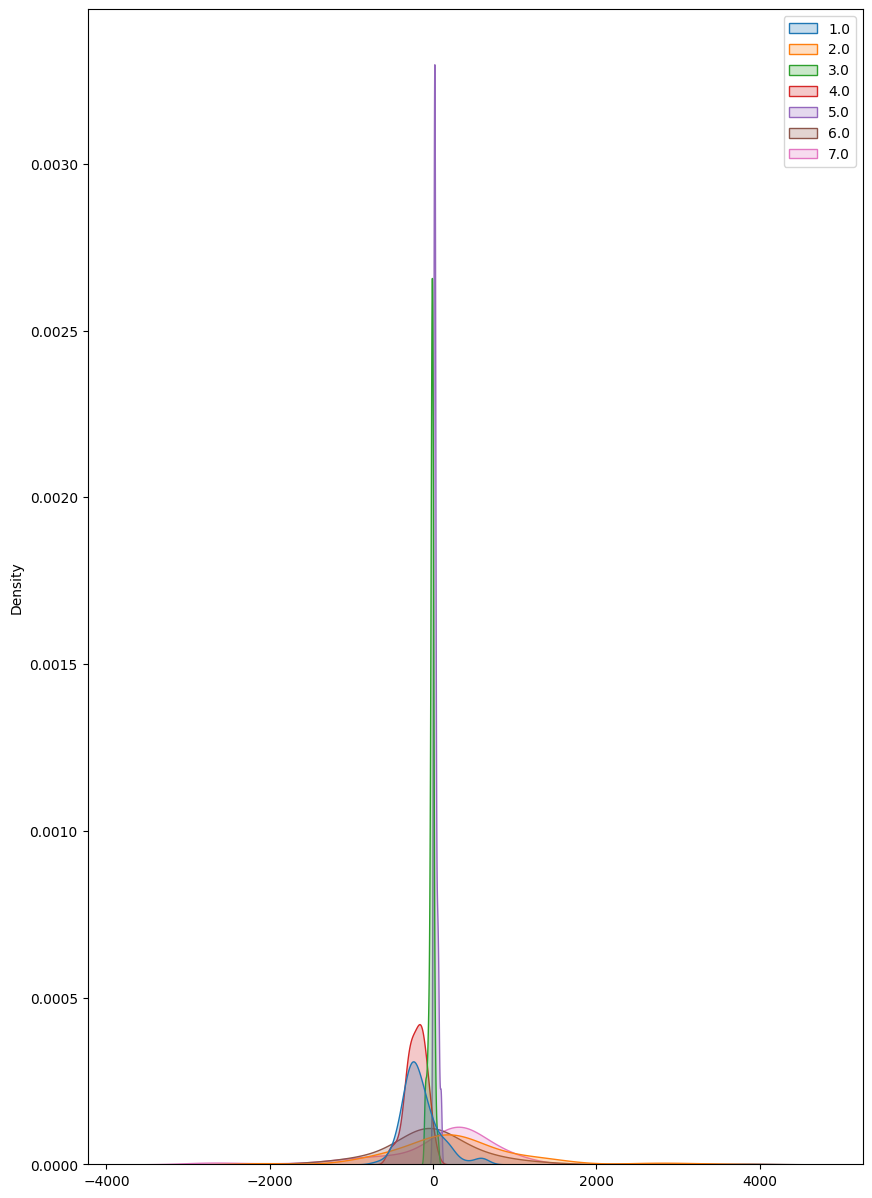

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 15))
distributionPlot = sns.kdeplot(data=averaged_df,fill=True)
plt.show()


## Statistical Testing

In [4]:
from scipy import stats
xgboost1_avg_balance = averaged_df.iloc[:, 6]  # XGBoost column

# Loop through columns 1-6 for other agents
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]
    # Check normality for both columns
    _, pvalue_xgboost1 = stats.shapiro(xgboost1_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print("P_value_xgboost1",pvalue_xgboost1)
    print("pvalue_other_agent ",pvalue_other_agent)
    # If both are normally distributed
    if pvalue_xgboost1 > 0.05 and pvalue_other_agent > 0.05:
        
        print("normal")
        statistic, pvalue = stats.ttest_ind(xgboost1_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
        else:
            print("There isn't a statistically significant difference")
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = stats.mannwhitneyu(xgboost1_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")


P_value_xgboost1 6.431869411045766e-10
pvalue_other_agent  7.655056138598509e-06
not normal
There is a statistically significant difference
P-Value 5.751841499254654e-09

P_value_xgboost1 6.431869411045766e-10
pvalue_other_agent  5.960590860735752e-06
not normal
There isn't a statistically significant difference
P_value_xgboost1 6.431869411045766e-10
pvalue_other_agent  2.353979898938897e-05
not normal
There is a statistically significant difference
P-Value 4.82313252811602e-09

P_value_xgboost1 6.431869411045766e-10
pvalue_other_agent  0.12275971927883295
not normal
There is a statistically significant difference
P-Value 1.6647673753991723e-11

P_value_xgboost1 6.431869411045766e-10
pvalue_other_agent  1.363414313922846e-07
not normal
There is a statistically significant difference
P-Value 2.9756562997076045e-08

P_value_xgboost1 6.431869411045766e-10
pvalue_other_agent  1.051049115319799e-09
not normal
There is a statistically significant difference
P-Value 0.003026313630508944



# Stat test with plotting

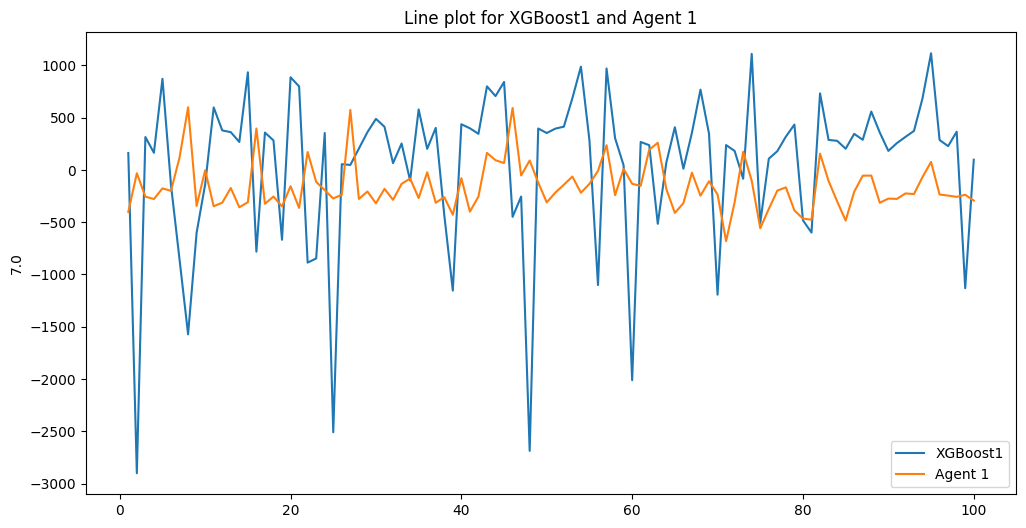

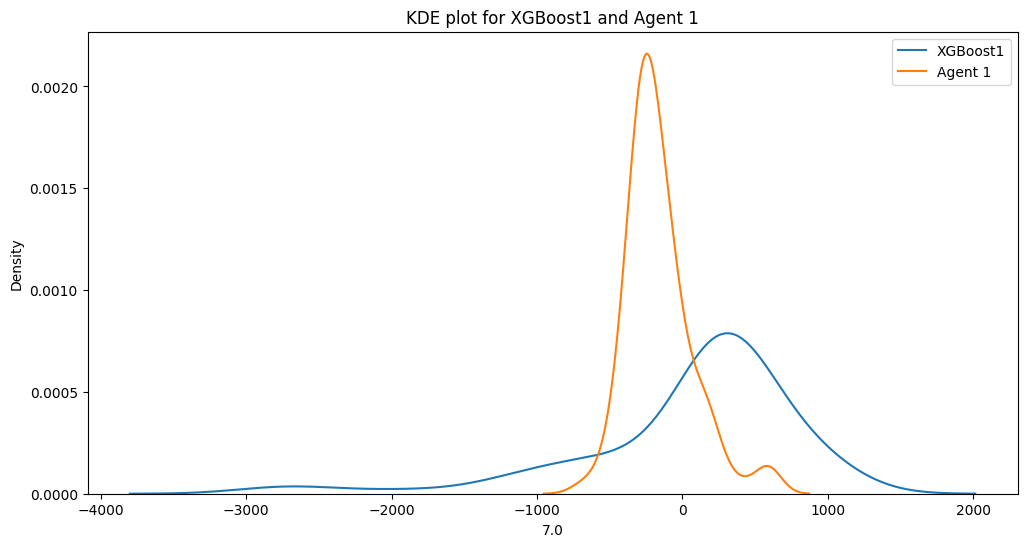

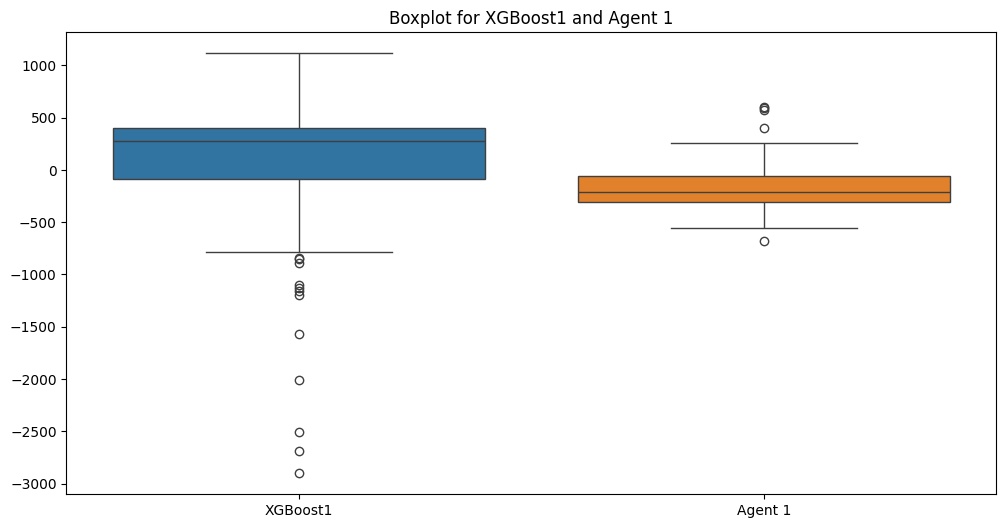

P_value_xgboost1 6.431869411045766e-10
pvalue_other_agent  7.655056138598509e-06
not normal
There is a statistically significant difference
P-Value 5.751841499254654e-09



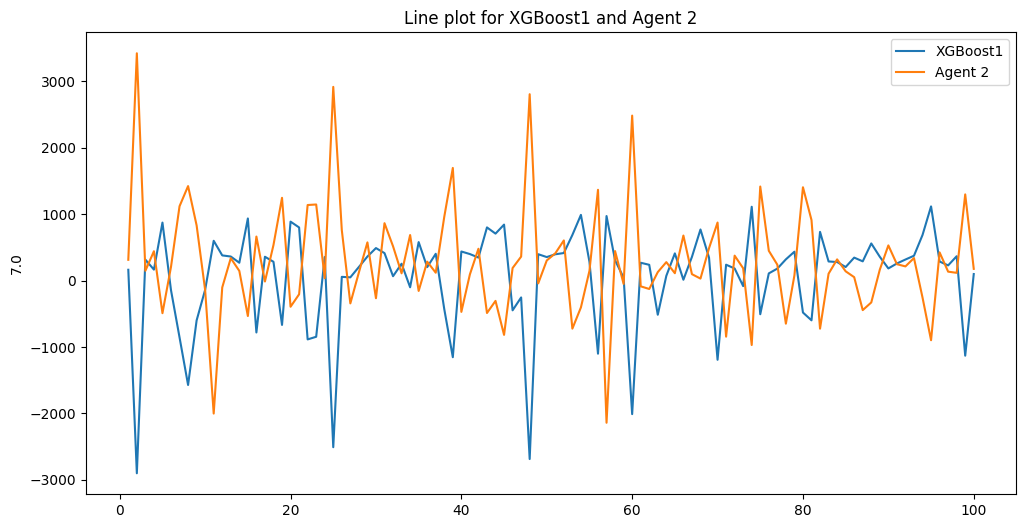

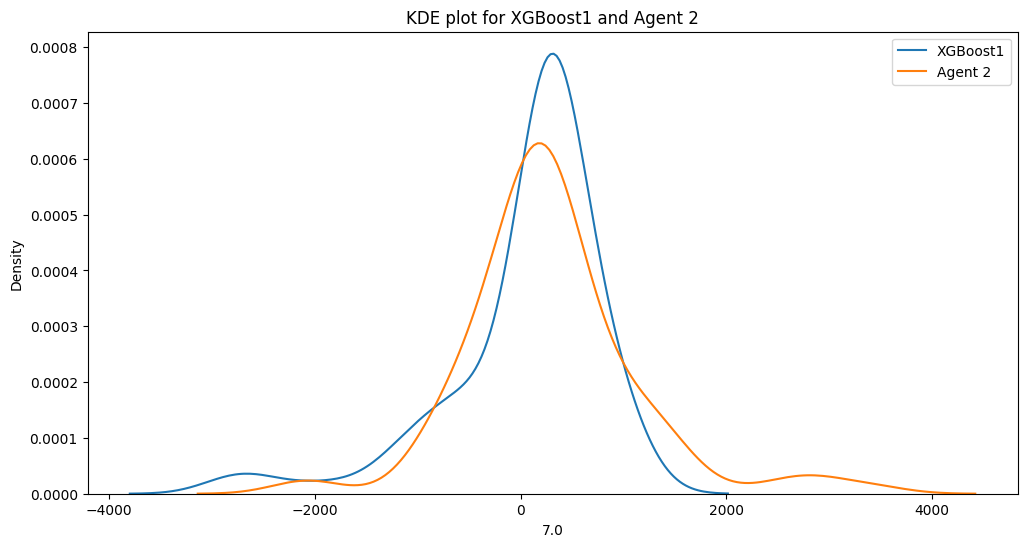

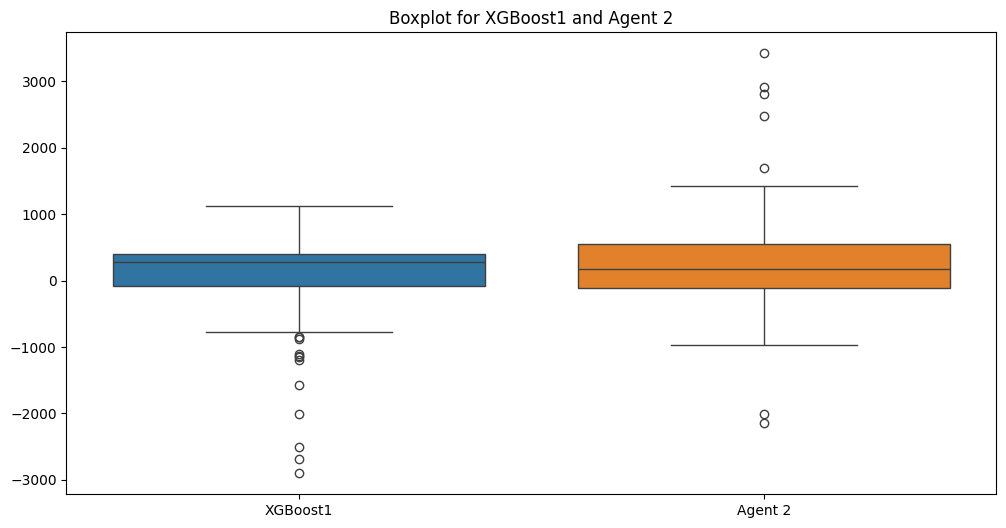

P_value_xgboost1 6.431869411045766e-10
pvalue_other_agent  5.960590860735752e-06
not normal
There isn't a statistically significant difference


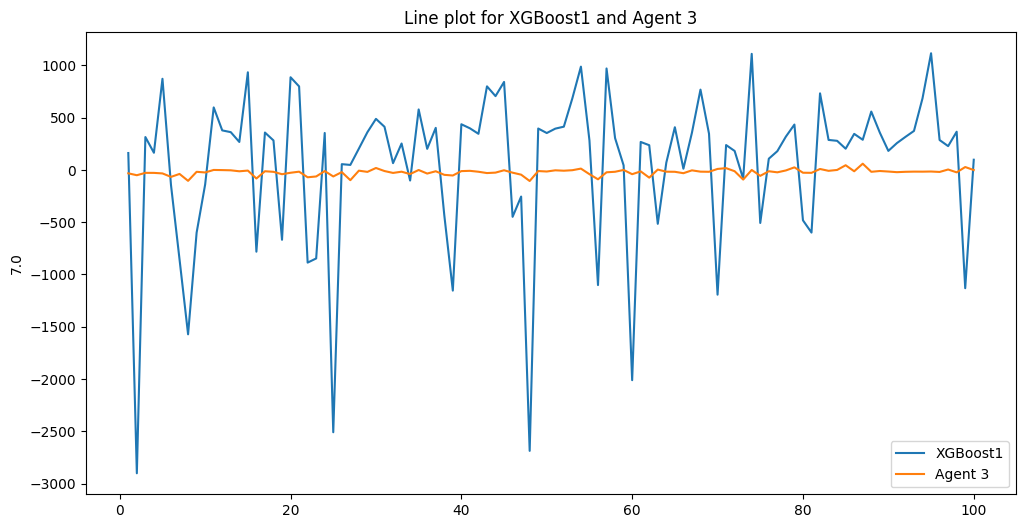

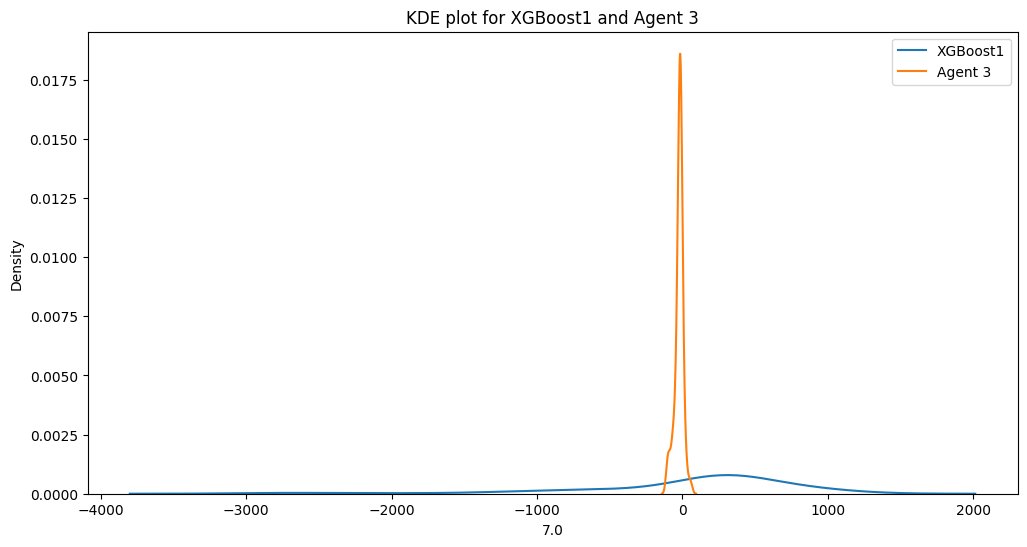

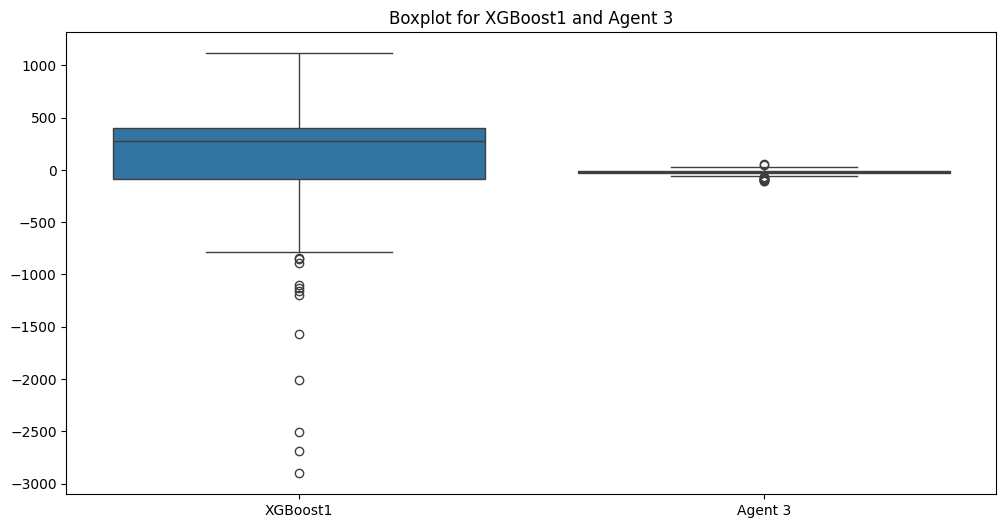

P_value_xgboost1 6.431869411045766e-10
pvalue_other_agent  2.353979898938897e-05
not normal
There is a statistically significant difference
P-Value 4.82313252811602e-09



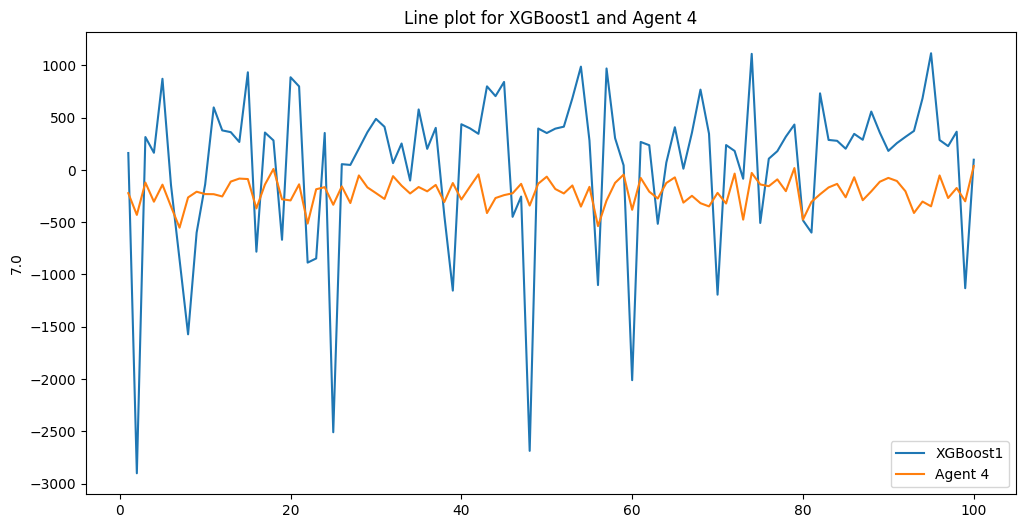

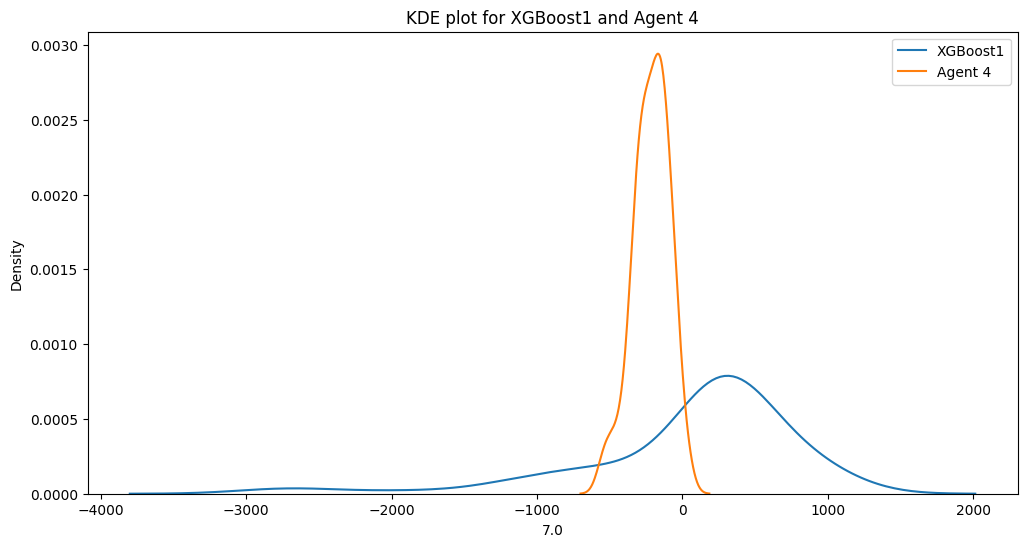

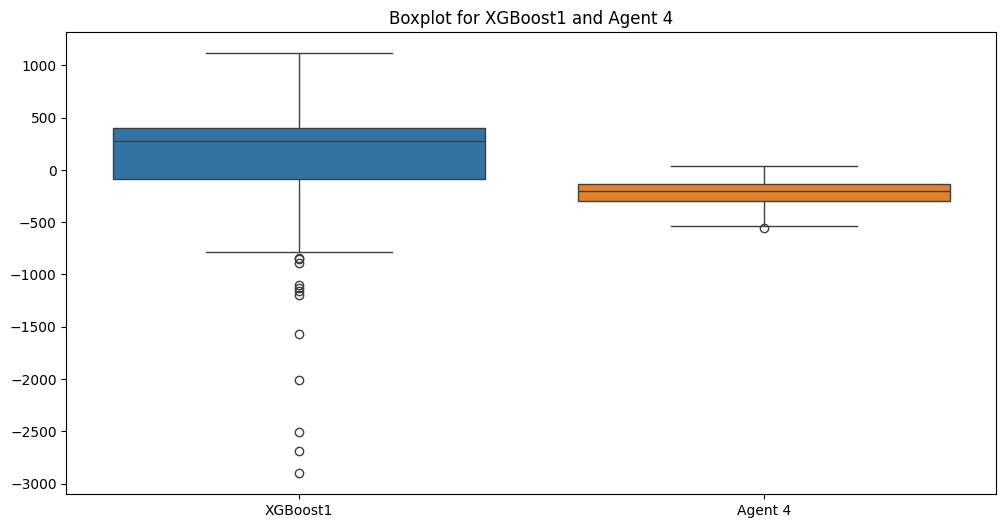

P_value_xgboost1 6.431869411045766e-10
pvalue_other_agent  0.12275971927883295
not normal
There is a statistically significant difference
P-Value 1.6647673753991723e-11



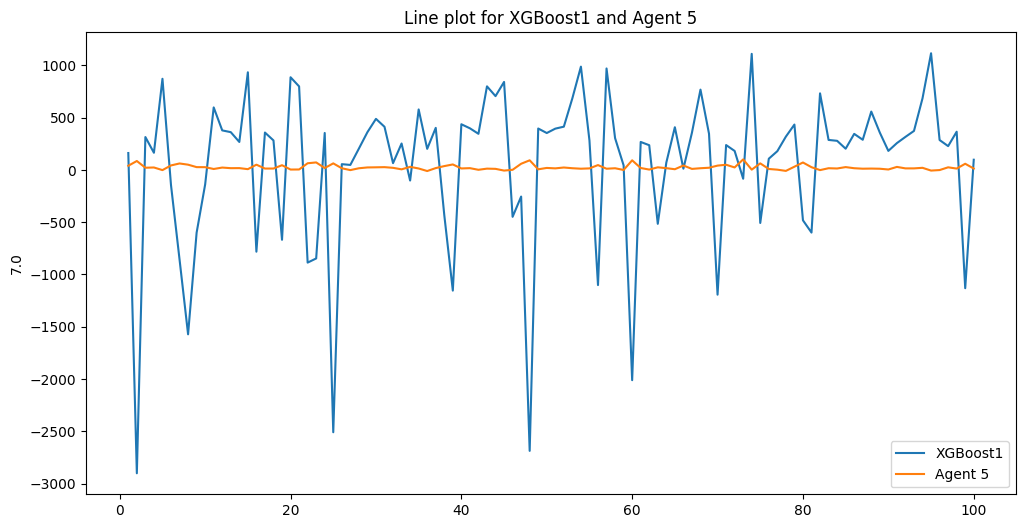

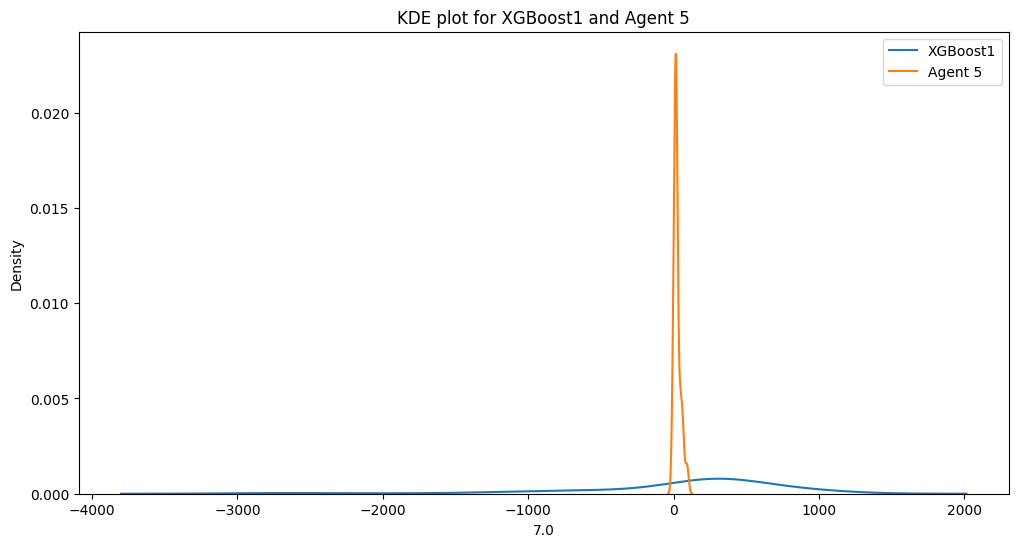

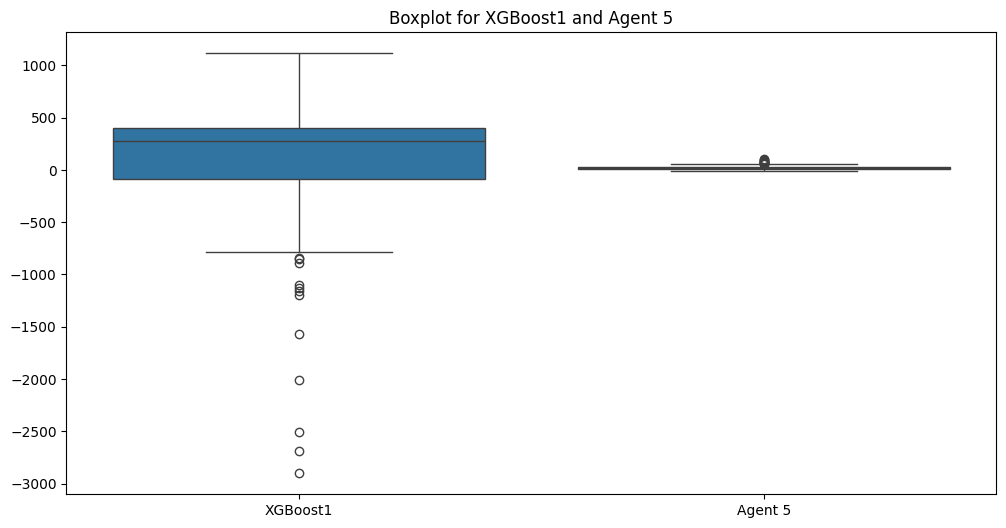

P_value_xgboost1 6.431869411045766e-10
pvalue_other_agent  1.363414313922846e-07
not normal
There is a statistically significant difference
P-Value 2.9756562997076045e-08



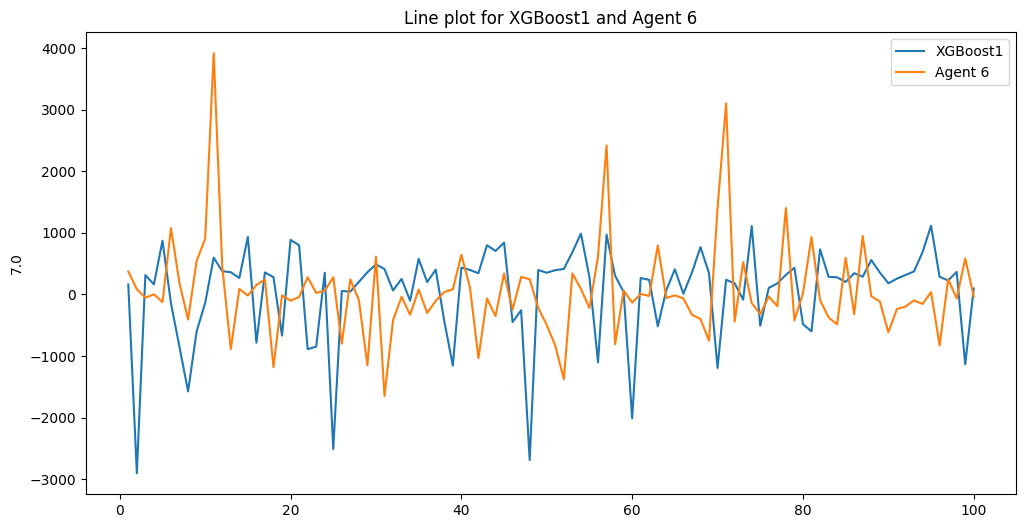

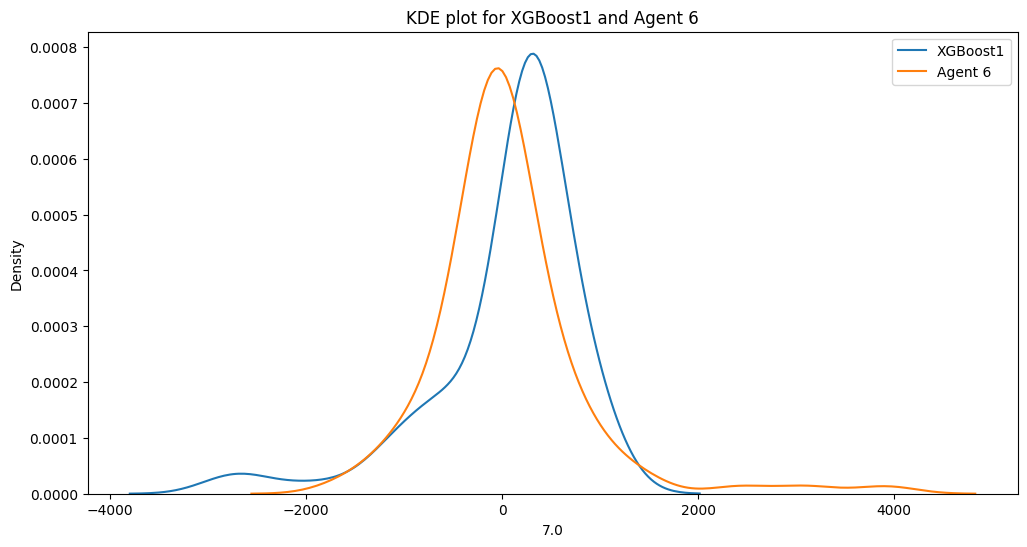

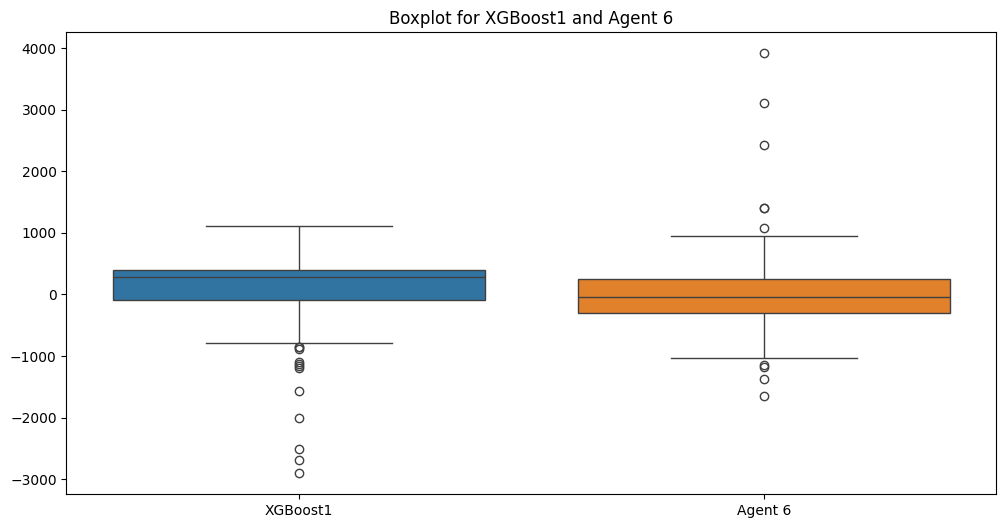

P_value_xgboost1 6.431869411045766e-10
pvalue_other_agent  1.051049115319799e-09
not normal
There is a statistically significant difference
P-Value 0.003026313630508944



In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

xgboost1_avg_balance = averaged_df.iloc[:, 6]  # XGBoost column

# Loop through columns 1-6 for other agents
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]

    # Line plot for XGBoost and the other agent
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=xgboost1_avg_balance, label='XGBoost1')
    sns.lineplot(data=other_agent_balance, label='Agent ' + str(col_index+1))
    plt.title('Line plot for XGBoost1 and Agent ' + str(col_index+1))
    plt.legend()
    plt.show()

    # KDE plot for the distributions
    plt.figure(figsize=(12, 6))
    sns.kdeplot(xgboost1_avg_balance, label='XGBoost1')
    sns.kdeplot(other_agent_balance, label='Agent ' + str(col_index+1))
    plt.title('KDE plot for XGBoost1 and Agent ' + str(col_index+1))
    plt.legend()
    plt.show()

    # Boxplot for the two distributions
    combined_data = pd.concat([xgboost1_avg_balance.rename('XGBoost1'), 
                               other_agent_balance.rename('Agent ' + str(col_index+1))], axis=1)
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=combined_data)
    plt.title('Boxplot for XGBoost1 and Agent ' + str(col_index+1))
    plt.show()

    # Check normality for both columns
    _, pvalue_xgboost1 = stats.shapiro(xgboost1_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print("P_value_xgboost1", pvalue_xgboost1)
    print("pvalue_other_agent ", pvalue_other_agent)

    # If both are normally distributed
    if pvalue_xgboost1 > 0.05 and pvalue_other_agent > 0.05:
        print("normal")
        statistic, pvalue = stats.ttest_ind(xgboost1_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
        else:
            print("There isn't a statistically significant difference")
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = stats.mannwhitneyu(xgboost1_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")


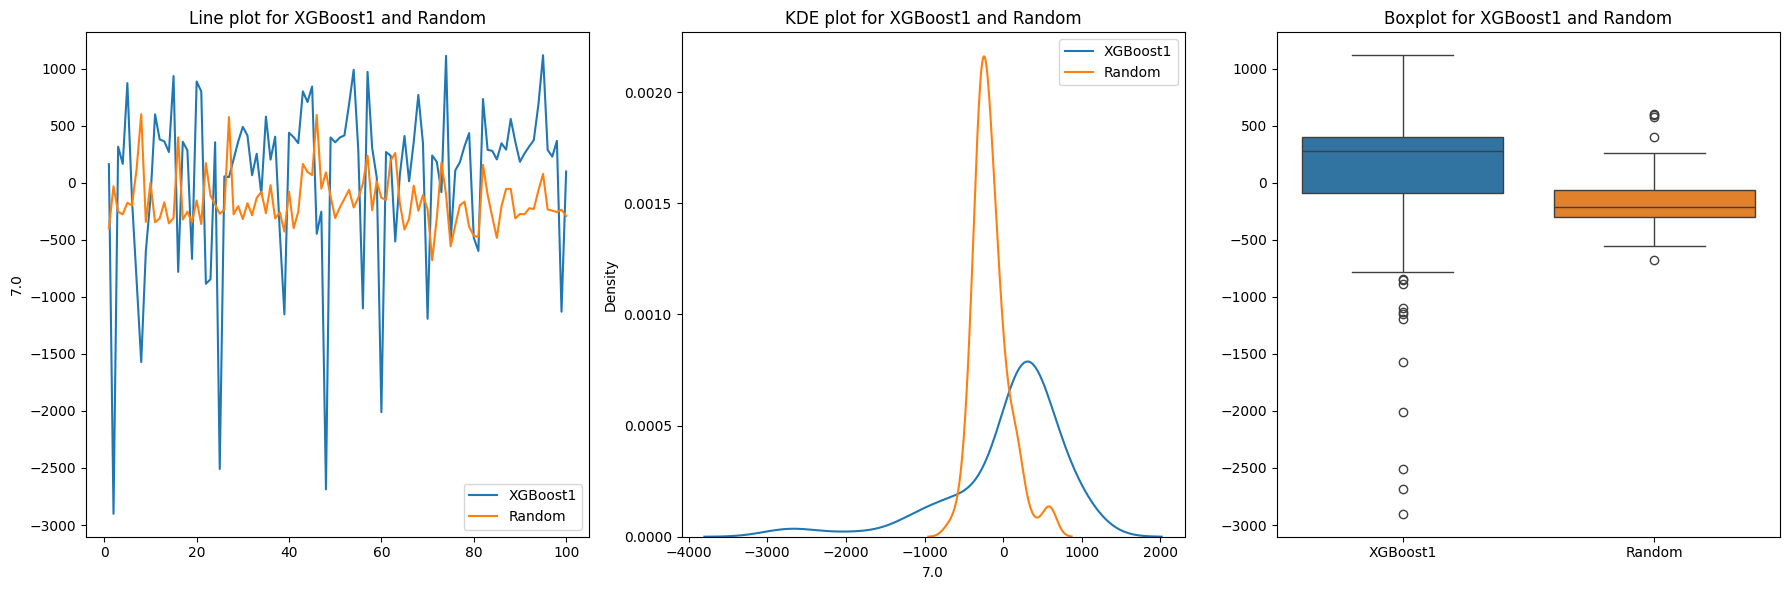

P_value_xgboost1 6.431869411045766e-10
P_value_Random 7.655056138598509e-06
not normal
There is a statistically significant difference
P-Value 5.751841499254654e-09



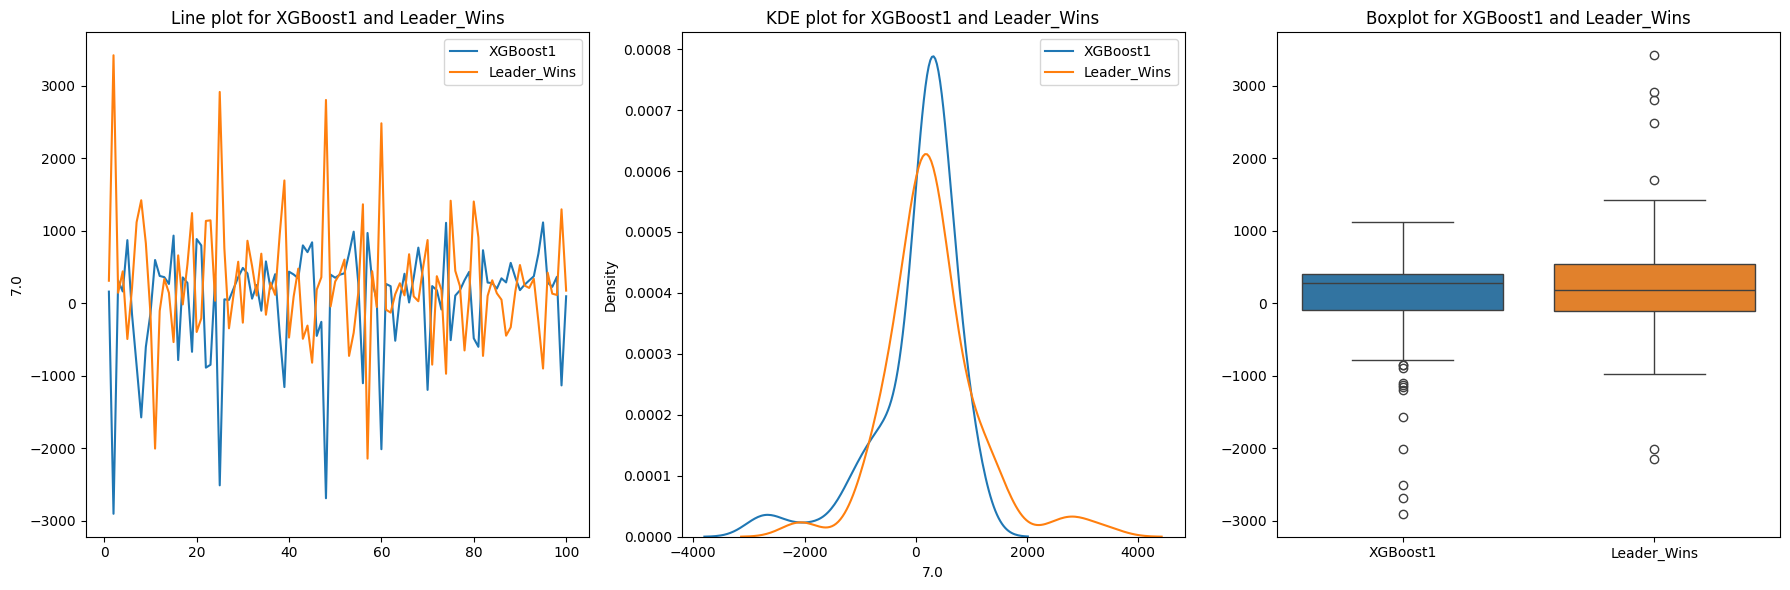

P_value_xgboost1 6.431869411045766e-10
P_value_Leader_Wins 5.960590860735752e-06
not normal
There isn't a statistically significant difference


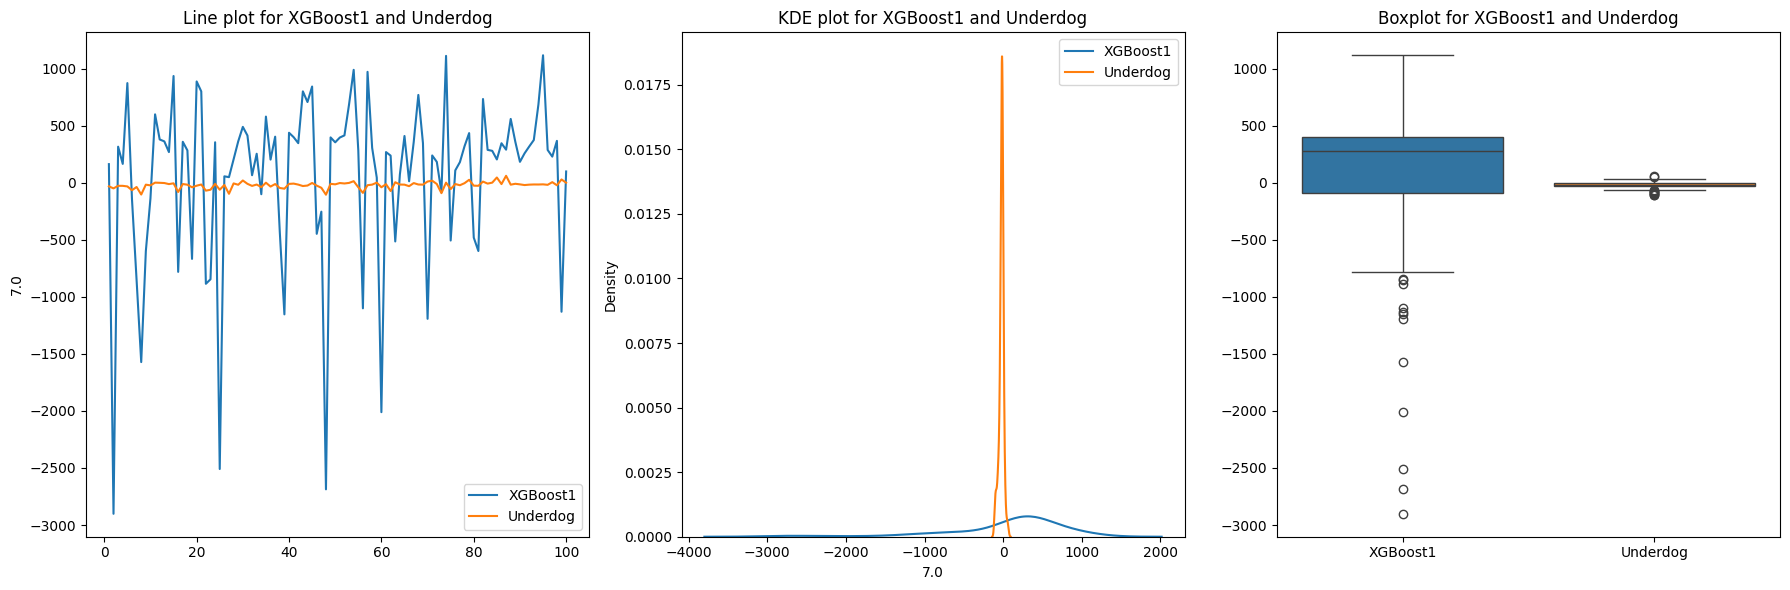

P_value_xgboost1 6.431869411045766e-10
P_value_Underdog 2.353979898938897e-05
not normal
There is a statistically significant difference
P-Value 4.82313252811602e-09



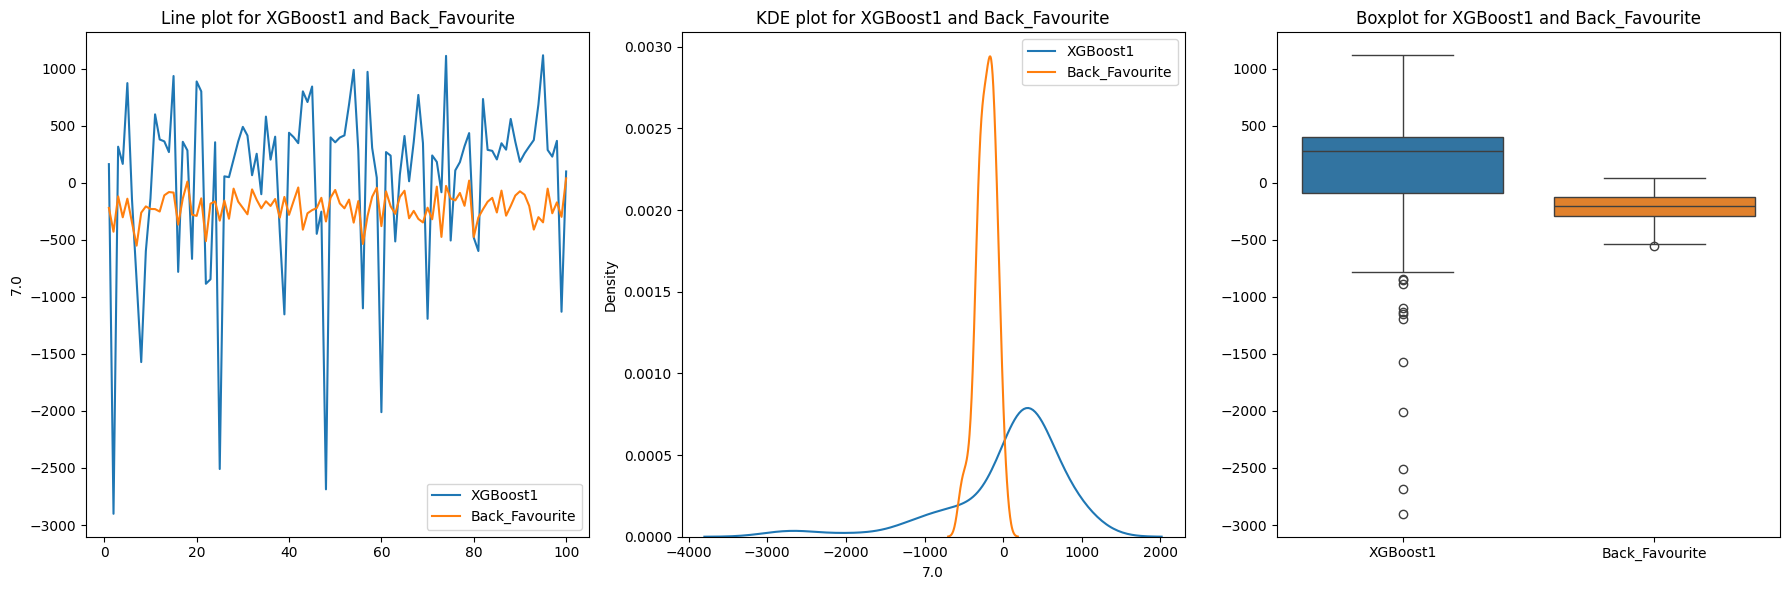

P_value_xgboost1 6.431869411045766e-10
P_value_Back_Favourite 0.12275971927883295
not normal
There is a statistically significant difference
P-Value 1.6647673753991723e-11



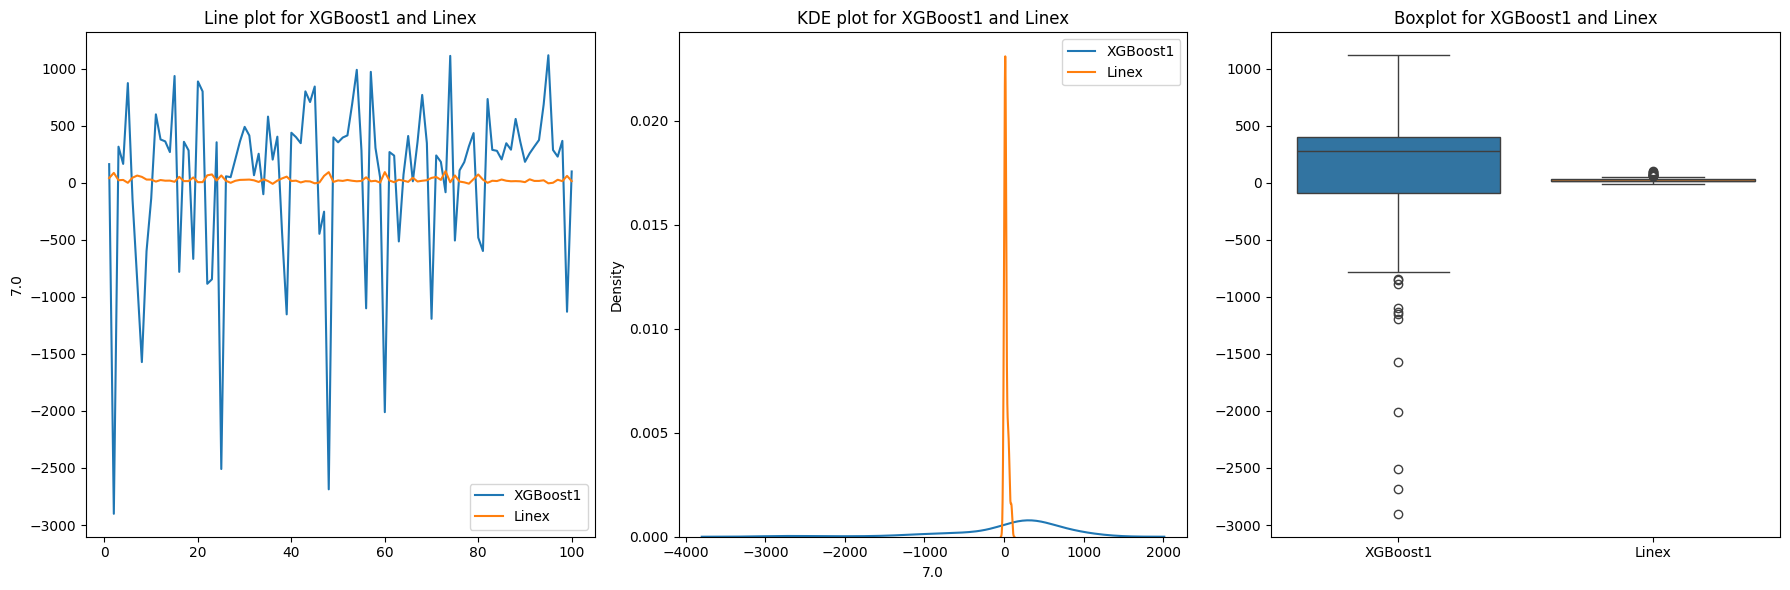

P_value_xgboost1 6.431869411045766e-10
P_value_Linex 1.363414313922846e-07
not normal
There is a statistically significant difference
P-Value 2.9756562997076045e-08



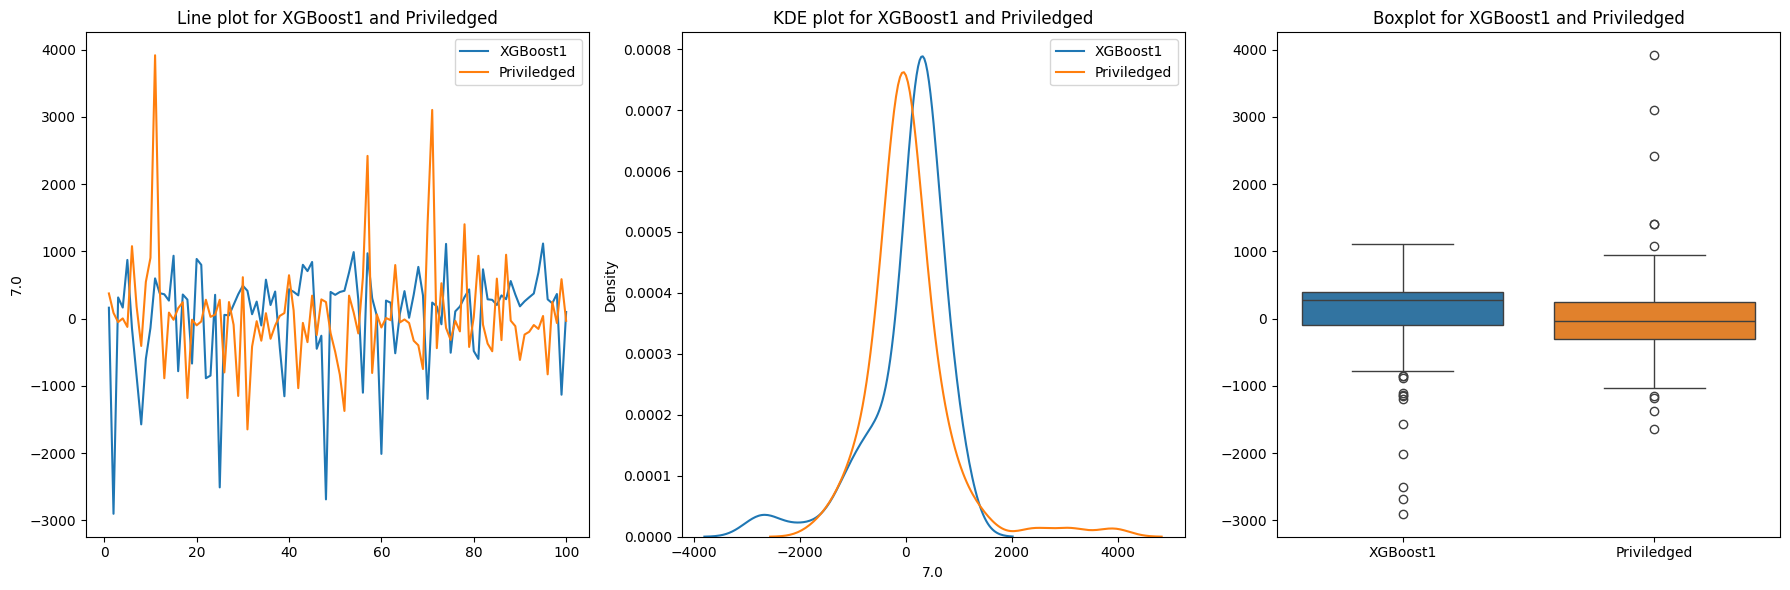

P_value_xgboost1 6.431869411045766e-10
P_value_Priviledged 1.051049115319799e-09
not normal
There is a statistically significant difference
P-Value 0.003026313630508944



In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

xgboost1_avg_balance = averaged_df.iloc[:, 6]  # XGBoost column

# Define agent names for easier access and readability
agent_names = ["Random", "Leader_Wins", "Underdog", "Back_Favourite", "Linex", "Priviledged"]

# Loop through columns 1-6 for other agents
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]
    agent_name = agent_names[col_index]

    # Group the plots horizontally
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Line plot for XGBoost and the other agent
    sns.lineplot(data=xgboost1_avg_balance, ax=axes[0], label='XGBoost1')
    sns.lineplot(data=other_agent_balance, ax=axes[0], label=agent_name)
    axes[0].set_title(f'Line plot for XGBoost1 and {agent_name}')
    axes[0].legend()

    # KDE plot for the distributions
    sns.kdeplot(xgboost1_avg_balance, ax=axes[1], label='XGBoost1')
    sns.kdeplot(other_agent_balance, ax=axes[1], label=agent_name)
    axes[1].set_title(f'KDE plot for XGBoost1 and {agent_name}')
    axes[1].legend()

    # Boxplot for the two distributions
    combined_data = pd.concat([xgboost1_avg_balance.rename('XGBoost1'), 
                               other_agent_balance.rename(agent_name)], axis=1)
    sns.boxplot(data=combined_data, ax=axes[2])
    axes[2].set_title(f'Boxplot for XGBoost1 and {agent_name}')
    
    plt.tight_layout()
    plt.show()

    # Check normality for both columns
    _, pvalue_xgboost1 = stats.shapiro(xgboost1_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print("P_value_xgboost1", pvalue_xgboost1)
    print(f"P_value_{agent_name}", pvalue_other_agent)

    # If both are normally distributed
    if pvalue_xgboost1 > 0.05 and pvalue_other_agent > 0.05:
        print("normal")
        statistic, pvalue = stats.ttest_ind(xgboost1_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
        else:
            print("There isn't a statistically significant difference")
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = stats.mannwhitneyu(xgboost1_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")


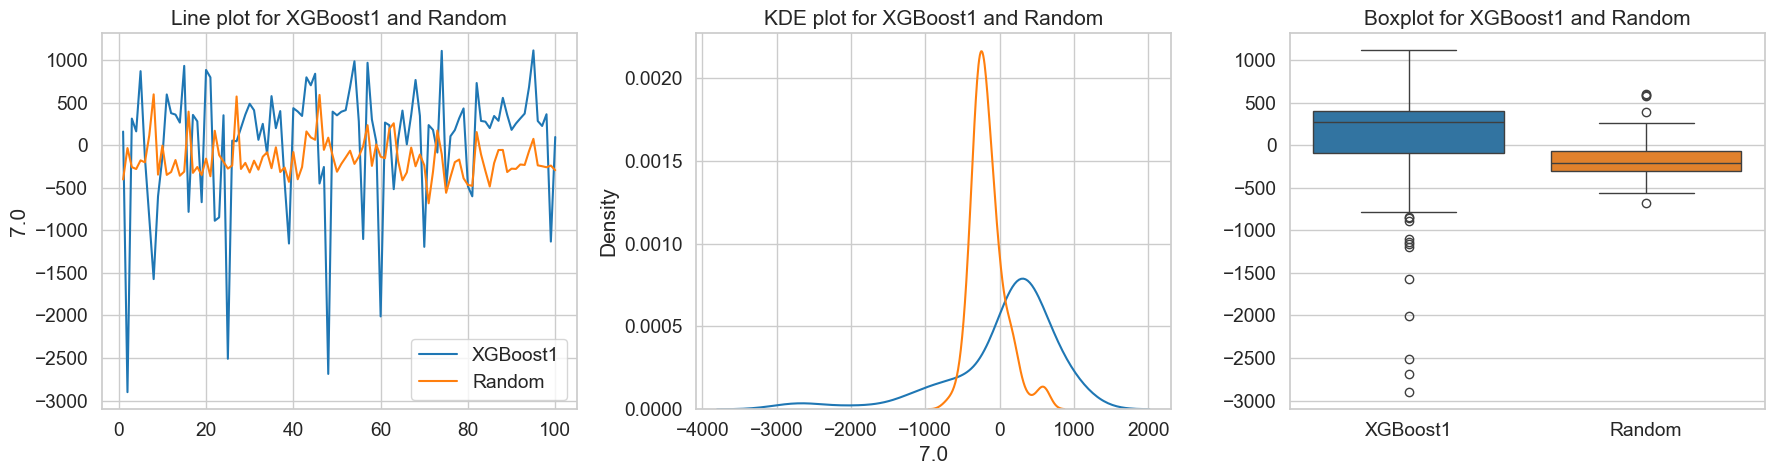

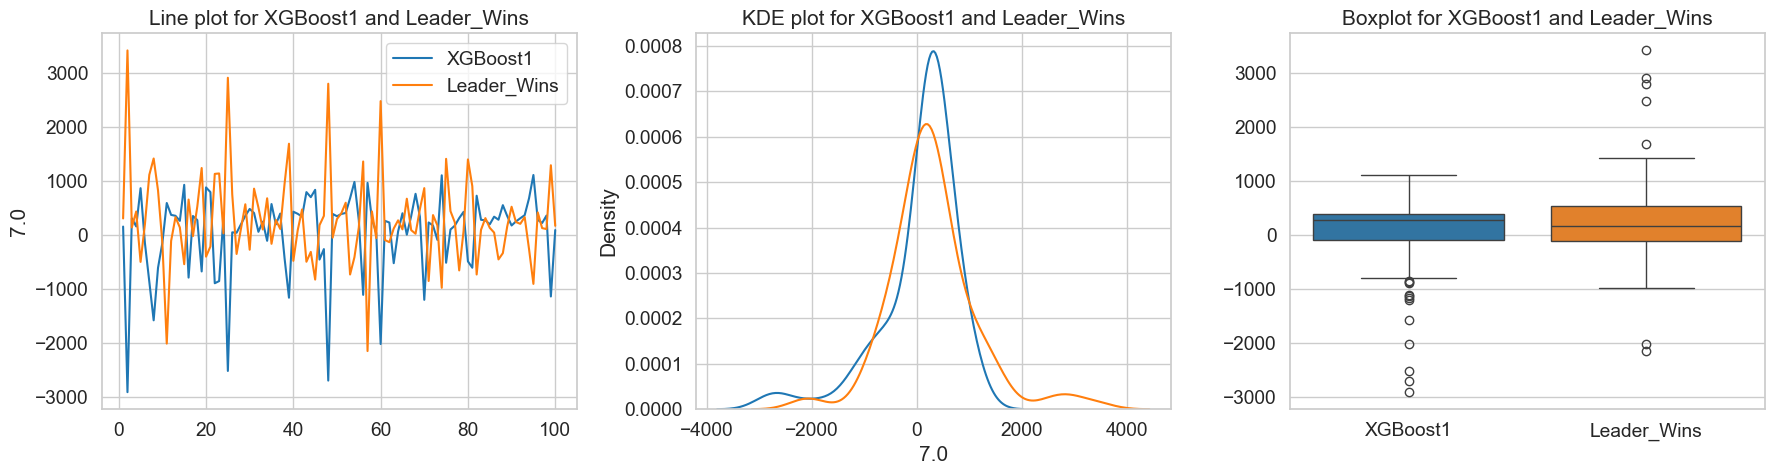

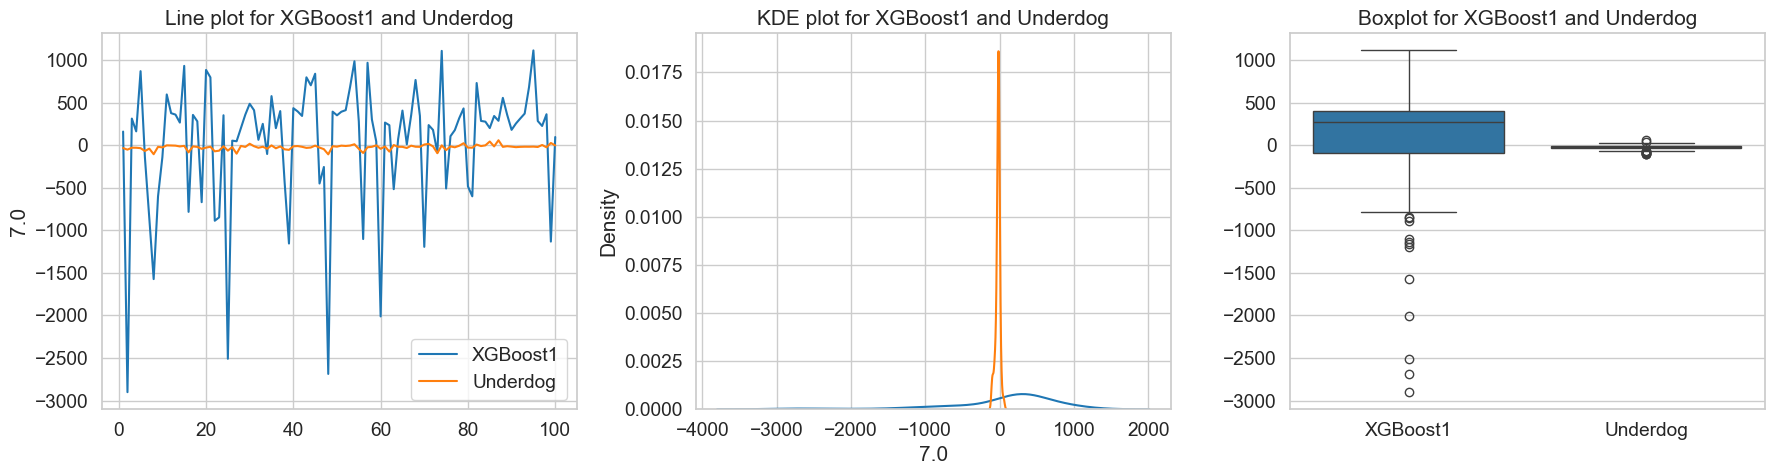

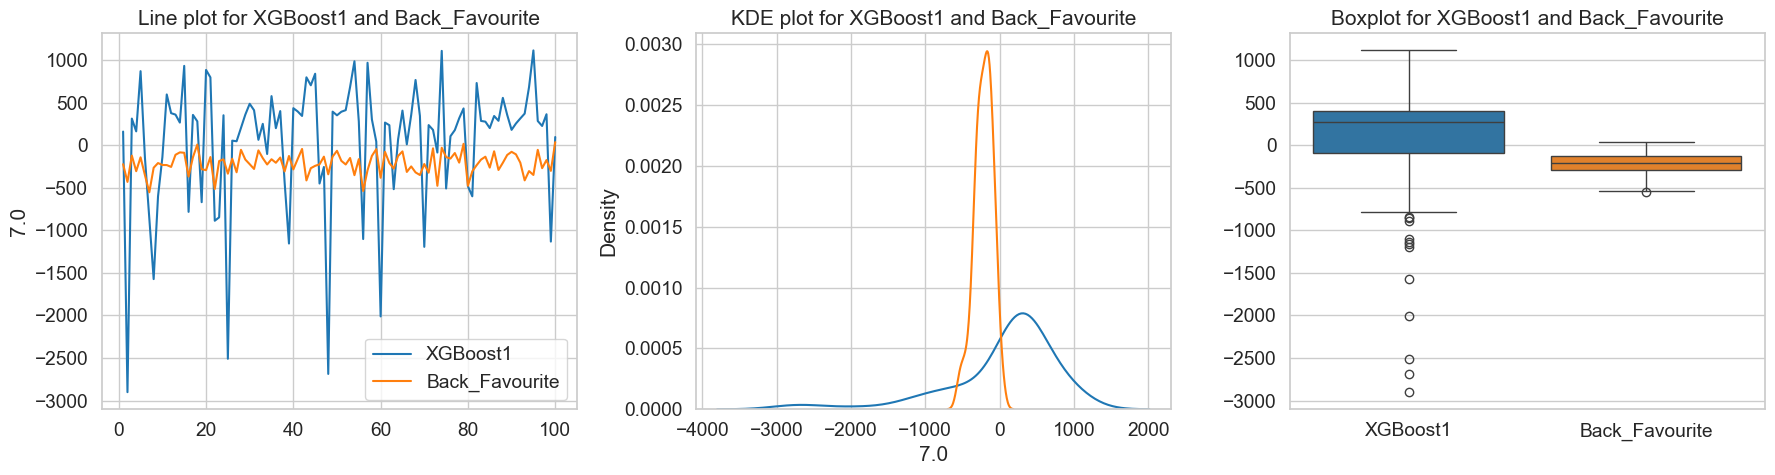

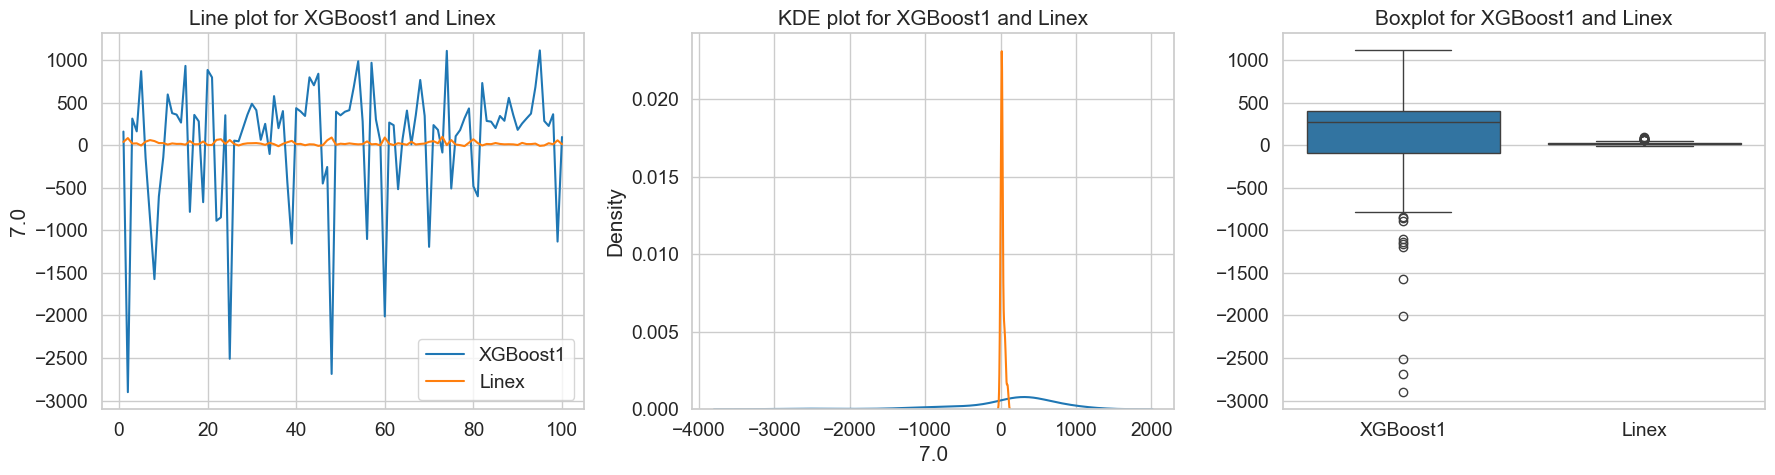

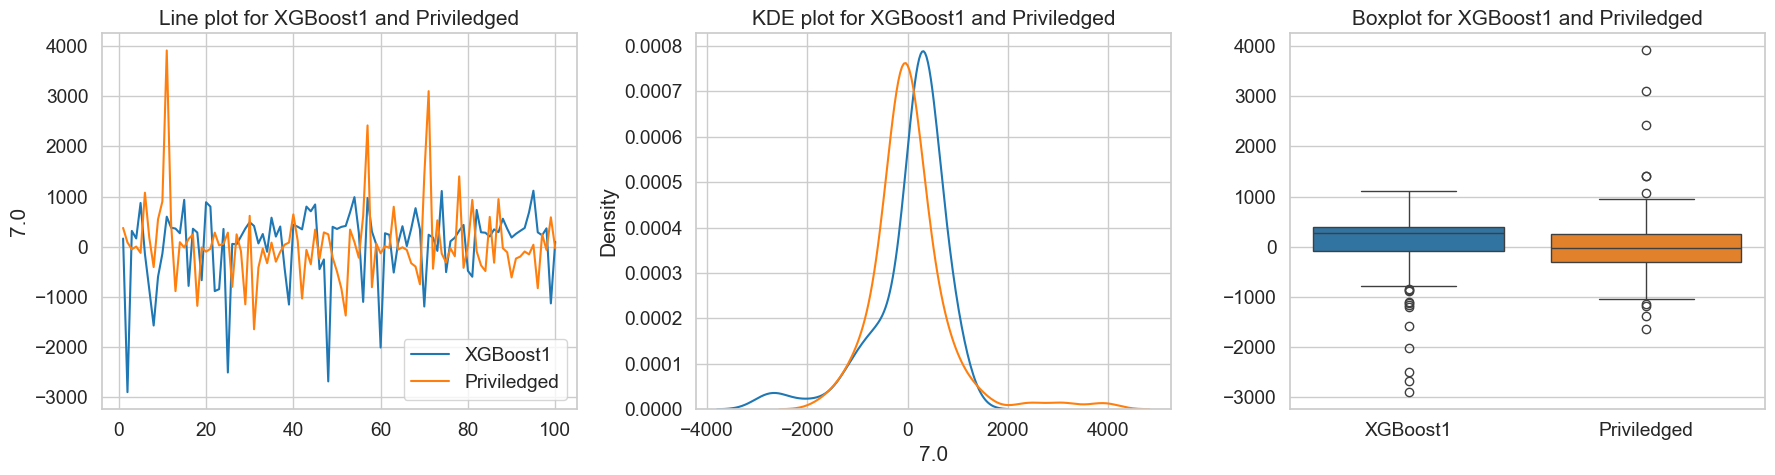

In [7]:
xgboost1_avg_balance = averaged_df.iloc[:, 6]  # XGBoost column

# Define agent names for easier access and readability
agent_names = ["Random", "Leader_Wins", "Underdog", "Back_Favourite", "Linex", "Priviledged"]

# Setting style and text scale for seaborn plots
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.25)  # Adjust the font_scale to increase text size

# Loop through columns 1-6 for other agents
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]
    agent_name = agent_names[col_index]

    # Group the plots horizontally with modified height
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Decreased the height from 6 to 5

    # Line plot for XGBoost and the other agent
    sns.lineplot(data=xgboost1_avg_balance, ax=axes[0], label='XGBoost1')
    sns.lineplot(data=other_agent_balance, ax=axes[0], label=agent_name)
    axes[0].set_title(f'Line plot for XGBoost1 and {agent_name}')

    # KDE plot for the distributions
    sns.kdeplot(xgboost1_avg_balance, ax=axes[1], label='XGBoost1')
    sns.kdeplot(other_agent_balance, ax=axes[1], label=agent_name)
    axes[1].set_title(f'KDE plot for XGBoost1 and {agent_name}')

    # Boxplot for the two distributions
    combined_data = pd.concat([xgboost1_avg_balance.rename('XGBoost1'), 
                               other_agent_balance.rename(agent_name)], axis=1)
    sns.boxplot(data=combined_data, ax=axes[2])
    axes[2].set_title(f'Boxplot for XGBoost1 and {agent_name}')
    
    plt.tight_layout()
    plt.show()